In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("stroke_risk_dataset.csv")

In [12]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [13]:
df.tail()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
69995,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,18,30.0,0
69996,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,24,33.0,0
69997,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,49,45.5,0
69998,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,45,48.5,0
69999,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,74,63.0,1


In [14]:
df = df.drop(columns=['Stroke Risk (%)'])
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Chest Pain                      70000 non-null  int64
 1   Shortness of Breath             70000 non-null  int64
 2   Irregular Heartbeat             70000 non-null  int64
 3   Fatigue & Weakness              70000 non-null  int64
 4   Dizziness                       70000 non-null  int64
 5   Swelling (Edema)                70000 non-null  int64
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64
 7   Excessive Sweating              70000 non-null  int64
 8   Persistent Cough                70000 non-null  int64
 9   Nausea/Vomiting                 70000 non-null  int64
 10  High Blood Pressure             70000 non-null  int64
 11  Chest Discomfort (Activity)     70000 non-null  int64
 12  Cold Hands/Feet                 70000 non-null  int64
 13  S

In [16]:
correlation = df.corr(method='pearson')
df_corr = correlation['At Risk (Binary)'].sort_values(ascending=False)
df_corr

At Risk (Binary)                  1.000000
Age                               0.612038
Cold Hands/Feet                   0.136642
Chest Pain                        0.135365
Snoring/Sleep Apnea               0.133681
Fatigue & Weakness                0.133060
Excessive Sweating                0.132806
High Blood Pressure               0.132301
Anxiety/Feeling of Doom           0.131466
Shortness of Breath               0.130482
Dizziness                         0.130444
Persistent Cough                  0.128700
Nausea/Vomiting                   0.128645
Irregular Heartbeat               0.124150
Chest Discomfort (Activity)       0.123640
Swelling (Edema)                  0.122416
Pain in Neck/Jaw/Shoulder/Back    0.120280
Name: At Risk (Binary), dtype: float64

In [17]:
x = df.drop(columns=['At Risk (Binary)'])  # independent variables (vars selain targetnya)
y = df['At Risk (Binary)']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Wajib dalam membangun Neural Network
from sklearn.preprocessing import StandardScaler
import joblib
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

joblib.dump(scaler, 'scaler.pkl')

# JANGAN LUPA SAAT TEST NEW DATA HARUS DI-SCALE JUGA PAKE scaler.transform()

['scaler.pkl']

In [21]:
 # convert x menjadi float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [22]:
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.long)

In [23]:
print(type(x_test))
# x_test

<class 'torch.Tensor'>


BUILDING MODEL

In [6]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
    # Input layer (16 features of the flower) -> 
    # Hidden Layer 1 (number of neurons) -> 
    # Hidden Layer 2 (number of neurons) -> 
    # Output Layer (2 classes of iris flowers)
    def __init__(self, in_features=16, h1=50, h2=50, out_features=2):
        super().__init__() # instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1) # fc = 'Fully Connected'
        self.fc2 = nn.Linear(h1, h2) # fc = 'Fully Connected'
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        # relu = Rectified Linear Unit ("Okay do something, 
        # and if the output of that something is less than zero, 
        # lets just call it zero.
        # Otherwise, use the output")
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [7]:
# manual randomization seed
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [25]:
# Set the criterion of model to measure the error, how far off the prictions are from the data
class_counts = torch.bincount(y_train)  # Count occurrences of each class
weights = 1.0 / class_counts.float()  # Inverse of frequency
criterion = torch.nn.CrossEntropyLoss(weight=weights) 
# Choose Adam Optimizer, lr = learning rate (if error doesnt go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [26]:
# Train our model
# Epochs => one run through all the training data in our network

epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    losses.append(loss.item())

    # Print every epoch
    print(f'Epoch {i+1}/{epochs}: Loss = {loss.item()}')

    # Stop if NaN loss occurs
    if torch.isnan(loss):
        print("NaN loss detected! Stopping training.")
        break

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 1/1000: Loss = 0.6971825361251831
Epoch 2/1000: Loss = 0.6967771649360657
Epoch 3/1000: Loss = 0.6963725090026855
Epoch 4/1000: Loss = 0.695968747138977
Epoch 5/1000: Loss = 0.695565402507782
Epoch 6/1000: Loss = 0.6951629519462585
Epoch 7/1000: Loss = 0.694760799407959
Epoch 8/1000: Loss = 0.6943594217300415
Epoch 9/1000: Loss = 0.6939583420753479
Epoch 10/1000: Loss = 0.693557620048523
Epoch 11/1000: Loss = 0.6931571960449219
Epoch 12/1000: Loss = 0.6927570700645447
Epoch 13/1000: Loss = 0.6923571228981018
Epoch 14/1000: Loss = 0.6919571757316589
Epoch 15/1000: Loss = 0.6915574669837952
Epoch 16/1000: Loss = 0.6911576390266418
Epoch 17/1000: Loss = 0.6907578706741333
Epoch 18/1000: Loss = 0.6903578639030457
Epoch 19/1000: Loss = 0.6899577379226685
Epoch 20/1000: Loss = 0.6895573735237122
Epoch 21/1000: Loss = 0.689156711101532
Epoch 22/1000: Loss = 0.6887557506561279
Epoch 23/1000: Loss = 0.6883540749549866
Epoch 24/1000: Loss = 0.6879520416259766
Epoch 25/1000: Loss = 0.687549

Text(0.5, 0, 'Epoch')

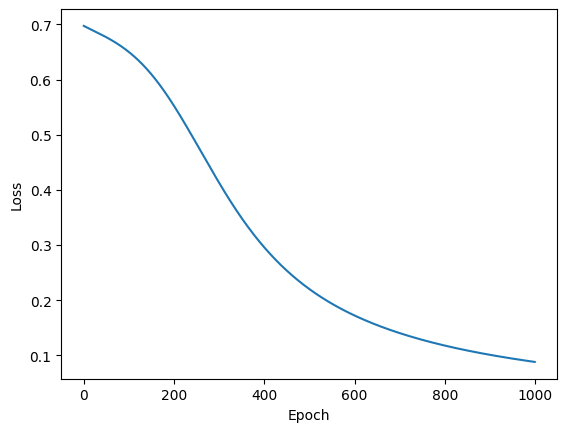

In [27]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

ACCURACY TEST

In [28]:
print("Training Labels Distribution:", torch.bincount(y_train))
print("Test Labels Distribution:", torch.bincount(y_test))

Training Labels Distribution: tensor([19664, 36336])
Test Labels Distribution: tensor([4892, 9108])


In [29]:
with torch.no_grad():  # Disable gradient calculations for evaluation
    y_pred = model(x_test)
    y_pred_labels = torch.argmax(y_pred, dim=1)  # Get predicted class (0 or 1 (not at risk of stroke or is at risk))
    accuracy = (y_pred_labels == y_test).float().mean()  # Compare with true labels

print(f'Accuracy: {accuracy.item() * 100:.2f}%')

Accuracy: 97.41%


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test.numpy(), y_pred_labels.numpy()))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4892
           1       0.99      0.97      0.98      9108

    accuracy                           0.97     14000
   macro avg       0.97      0.98      0.97     14000
weighted avg       0.98      0.97      0.97     14000



In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.numpy(), y_pred_labels.numpy()))

TESTING A NEW DATA

Note: Jika train data pake Feature Scaling, maka saat test new data juga harus Feature-scaled

In [31]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,1


In [32]:
scaler = joblib.load('scaler.pkl')

In [3]:
# Jika dilakukan Feature Scaling pada data training, maka test data juga harus menggunakan Scaling yg sama (scaler.transform(features))
import joblib
scaler = joblib.load('scaler.pkl')

# new_data = torch.tensor([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 24])
# new_data = torch.tensor([[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 74]], dtype=torch.float32) # Stroke
new_data = torch.tensor(scaler.transform([[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 24]]), dtype=torch.float32) # Not Stroke
# new_data = torch.tensor(scaler.transform([[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 54]]), dtype=torch.float32) # Stroke
# new_data = torch.tensor(scaler.transform([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 20]]), dtype=torch.float32) # Aurick
# new_data = torch.tensor(scaler.transform([[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 18]]), dtype=torch.float32) # Kei
# new_data = torch.tensor(scaler.transform([[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 20]]), dtype=torch.float32) # Dewo
print(new_data)

tensor([[-1.0022, -0.9923, -0.9961,  1.0004, -1.0064,  0.9968, -1.0020,  0.9921,
         -1.0039, -0.9985, -1.0026,  1.0015,  1.0013,  1.0008, -1.0016, -1.4237]])


c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
print(model(new_data))
# print(abs(model(new_data)))

tensor([[-1.3290,  1.4538]], grad_fn=<AddmmBackward0>)


In [35]:
model.eval()

with torch.no_grad():
    if model(new_data).argmax().item() == 0: # Jika yg nilainya lebih besar adalah class 0
        print("This Person is not in risk of Stroke")
    else:
        print('This Person is in risk of Stroke')

This Person is in risk of Stroke


SAVING & LOADING MODEL

In [36]:
# Saving NN Model
torch.save(model.state_dict(), 'model.pt')

In [8]:
# Load saved Model
new_model = Model()
new_model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [9]:
print(new_model(new_data))

tensor([[ 3.0724, -3.1424]], grad_fn=<AddmmBackward0>)


In [42]:
# Mastiin ke-load
new_model.eval()

with torch.no_grad():
    if new_model(new_data).argmax().item() == 0: # Jika yg nilainya lebih besar adalah class 0
        print("This Person is not in risk of Stroke")
    else:
        print('This Person is in risk of Stroke')

This Person is not in risk of Stroke


In [24]:
with torch.no_grad():  # Disable gradient calculations for evaluation
    y_pred = new_model(x_test)
    y_pred_labels = torch.argmax(y_pred, dim=1)  # Get predicted class (0 or 1 (not at risk of stroke or is at risk))
    accuracy = (y_pred_labels == y_test).float().mean()  # Compare with true labels

print(f'Accuracy: {accuracy.item() * 100:.2f}%')

Accuracy: 97.41%


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test.numpy(), y_pred_labels.numpy()))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4892
           1       0.99      0.97      0.98      9108

    accuracy                           0.97     14000
   macro avg       0.97      0.98      0.97     14000
weighted avg       0.98      0.97      0.97     14000



In [26]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.numpy(), y_pred_labels.numpy()))

[[4840   52]
 [ 311 8797]]


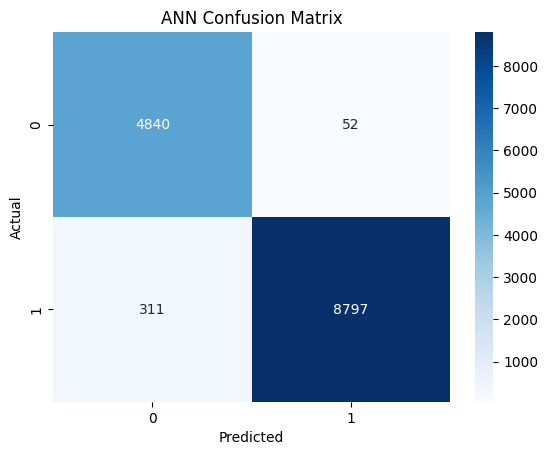

In [31]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test.numpy(), y_pred_labels.numpy()), annot=True, fmt='d', cmap='Blues')
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(precision_score(y_test.numpy(), y_pred_labels.numpy()))
print(recall_score(y_test.numpy(), y_pred_labels.numpy()))
print(f1_score(y_test.numpy(), y_pred_labels.numpy()))
print(accuracy_score(y_test.numpy(), y_pred_labels.numpy()))

0.9941236297886766
0.9658541941150637
0.979785042044885
0.9740714285714286
